### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

In [3]:
habermans_dataset = pd.read_csv("Habermans_Survival_Data_Set.csv",names= ['age','year_of_operation','axillary_nodes','survival_class'] )

In [4]:
habermans_dataset.head()

,age,year_of_operation,axillary_nodes,survival_class
0,age,year_of_operation,axillary_nodes,survival_class
1,30,64,1,1
2,30,62,3,1
3,30,65,1,1
4,31,59,2,1


In [5]:
habermans_dataset.shape

(307, 4)

This dataset has 306 observations and 4features (1 among them is class feature )

In [6]:
 habermans_dataset['survival_class'].value_counts()

survival_class
1                 225
2                  81
survival_class      1
Name: count, dtype: int64

In [7]:
sns.set_style("whitegrid")

In [8]:
habermans_dataset['survival_class'] = habermans_dataset['survival_class'].apply(lambda x: 'survived >= 5yrs' if x == 1 else 'survived < 5yrs')

In [9]:
habermans_dataset['survival_class'].value_counts()

survival_class
survived < 5yrs    307
Name: count, dtype: int64

In [10]:
habermans_dataset_class_1 = habermans_dataset[habermans_dataset['survival_class'] == 'survived >= 5yrs']

In [11]:
habermans_dataset_class_1.head()

,age,year_of_operation,axillary_nodes,survival_class


In [12]:
habermans_dataset_class_2 = habermans_dataset[habermans_dataset['survival_class'] == 'survived < 5yrs']

In [13]:
habermans_dataset_class_2.head()

,age,year_of_operation,axillary_nodes,survival_class
0,age,year_of_operation,axillary_nodes,survived < 5yrs
1,30,64,1,survived < 5yrs
2,30,62,3,survived < 5yrs
3,30,65,1,survived < 5yrs
4,31,59,2,survived < 5yrs


Text(0.5, 1.0, "Histogram with PDF for 'age' feature")

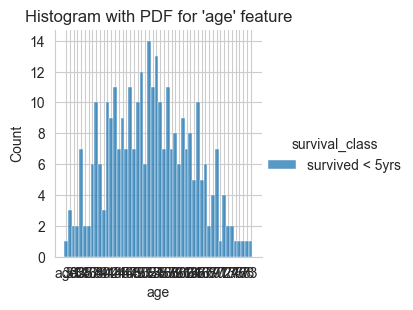

In [14]:
sns.FacetGrid(habermans_dataset,hue='survival_class').map(sns.histplot,'age').add_legend()
plt.title("Histogram with PDF for 'age' feature")

Text(0.5, 1.0, "Histogram with PDF for 'year_of_operation' feature ")

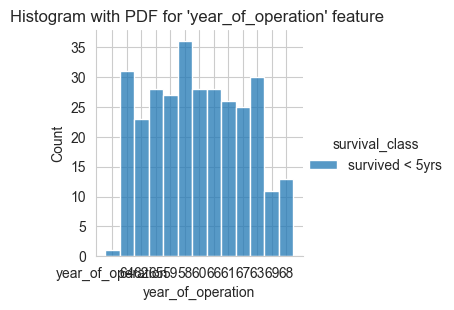

In [15]:
sns.FacetGrid(habermans_dataset,hue='survival_class').map(sns.histplot,'year_of_operation').add_legend()
plt.title("Histogram with PDF for 'year_of_operation' feature ")

Text(0.5, 1.0, "Histogram with PDF for 'axillary_nodes' feature")

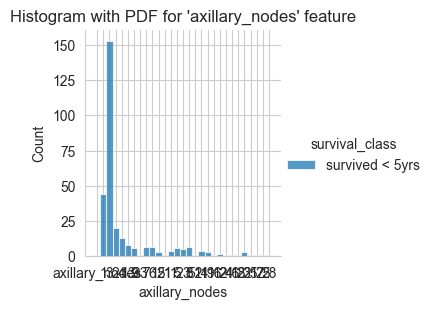

In [16]:
sns.FacetGrid(habermans_dataset,hue='survival_class').map(sns.histplot,'axillary_nodes').add_legend()
plt.title("Histogram with PDF for 'axillary_nodes' feature")

In [17]:
count,bin_edges = np.histogram(habermans_dataset_class_1['axillary_nodes'],density=True,bins=10)
PDF = count/sum(count)
print(PDF)
print(bin_edges)

[nan nan nan nan nan nan nan nan nan nan]
[0.0 0.1 0.2 0.30000000000000004 0.4 0.5 0.6000000000000001
 0.7000000000000001 0.8 0.9 1.0]


c:\users\r5\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


In [18]:
habermans_dataset_class_1['axillary_nodes'] = pd.to_numeric(habermans_dataset_class_1['axillary_nodes'], errors='coerce')

In [19]:
print(habermans_dataset_class_1['axillary_nodes'].isna().sum())
print(np.isinf(habermans_dataset_class_1['axillary_nodes']).sum())

0
0


In [20]:
data = {'axillary_nodes': np.random.randint(0, 50, size=100)}
habermans_dataset_class_1 = pd.DataFrame(data)


habermans_dataset_class_1['axillary_nodes'] = pd.to_numeric(habermans_dataset_class_1['axillary_nodes'], errors='coerce')
habermans_dataset_class_1 = habermans_dataset_class_1.dropna(subset=['axillary_nodes'])


count, bin_edges = np.histogram(habermans_dataset_class_1['axillary_nodes'], density=True, bins=10)


if np.any(np.isnan(count)) or np.any(np.isinf(count)):
    raise ValueError("Count values contain NaNs or Infs after histogram calculation.")


total_count = np.sum(count)
if total_count > 0:
    PDF = count / total_count
else:
    PDF = count 


print("PDF:", PDF)
print("Bin edges:", bin_edges)


PDF: [0.13 0.08 0.1  0.15 0.1  0.1  0.09 0.1  0.06 0.09]
Bin edges: [ 0.   4.9  9.8 14.7 19.6 24.5 29.4 34.3 39.2 44.1 49. ]


In [21]:
CDF = np.cumsum(PDF)
print(CDF)

[0.13 0.21 0.31 0.46 0.56 0.66 0.75 0.85 0.91 1.  ]


Text(0.5, 1.0, "PDF and CDF of 'axillary_nodes' feature for survival_class = 'survived>=5yrs' ")

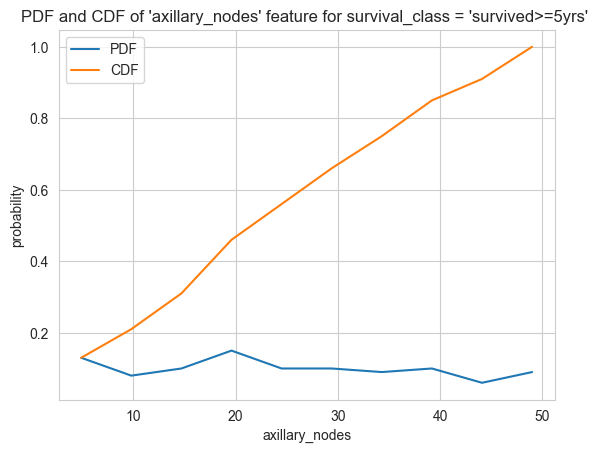

In [22]:
plt.plot(bin_edges[1:],PDF,label = "PDF",)
plt.plot(bin_edges[1:],CDF,label = "CDF")
plt.legend()
plt.xlabel("axillary_nodes")
plt.ylabel("probability")
plt.title("PDF and CDF of 'axillary_nodes' feature for survival_class = 'survived>=5yrs' ")

In [23]:
data_class_1 = {'axillary_nodes': ['10', '15', '20', 'NaN', '25']}
data_class_2 = {'axillary_nodes': ['5', '10', 'NaN', '20', 'invalid']}
habermans_dataset_class_1 = pd.DataFrame(data_class_1)
habermans_dataset_class_2 = pd.DataFrame(data_class_2)


print("Class 1 data types:", habermans_dataset_class_1.dtypes)
print("Class 1 unique values:", habermans_dataset_class_1['axillary_nodes'].unique())

print("Class 2 data types:", habermans_dataset_class_2.dtypes)
print("Class 2 unique values:", habermans_dataset_class_2['axillary_nodes'].unique())


Class 1 data types: axillary_nodes    object
dtype: object
Class 1 unique values: ['10' '15' '20' 'NaN' '25']
Class 2 data types: axillary_nodes    object
dtype: object
Class 2 unique values: ['5' '10' 'NaN' '20' 'invalid']


In [24]:
habermans_dataset_class_1['axillary_nodes'] = pd.to_numeric(habermans_dataset_class_1['axillary_nodes'], errors='coerce')
habermans_dataset_class_2['axillary_nodes'] = pd.to_numeric(habermans_dataset_class_2['axillary_nodes'], errors='coerce')

habermans_dataset_class_1 = habermans_dataset_class_1.dropna(subset=['axillary_nodes'])
habermans_dataset_class_2 = habermans_dataset_class_2.dropna(subset=['axillary_nodes'])


In [25]:
print("Class 1 data types after conversion:", habermans_dataset_class_1.dtypes)
print("Class 1 NaN count:", habermans_dataset_class_1['axillary_nodes'].isna().sum())

print("Class 2 data types after conversion:", habermans_dataset_class_2.dtypes)
print("Class 2 NaN count:", habermans_dataset_class_2['axillary_nodes'].isna().sum())


Class 1 data types after conversion: axillary_nodes    float64
dtype: object
Class 1 NaN count: 0
Class 2 data types after conversion: axillary_nodes    float64
dtype: object
Class 2 NaN count: 0


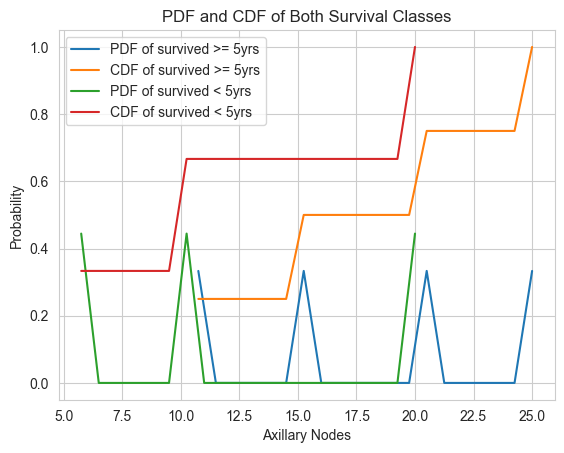

In [26]:
count, bin_edges = np.histogram(habermans_dataset_class_1['axillary_nodes'], bins=20, density=True)
PDF = count
CDF = np.cumsum(PDF) * np.diff(bin_edges)

plt.plot(bin_edges[1:], PDF, label="PDF of survived >= 5yrs")
plt.plot(bin_edges[1:], CDF, label="CDF of survived >= 5yrs")


count, bin_edges = np.histogram(habermans_dataset_class_2['axillary_nodes'], bins=20, density=True)
PDF = count
CDF = np.cumsum(PDF) * np.diff(bin_edges)

plt.plot(bin_edges[1:], PDF, label="PDF of survived < 5yrs")
plt.plot(bin_edges[1:], CDF, label="CDF of survived < 5yrs")


plt.legend()
plt.xlabel("Axillary Nodes")
plt.ylabel("Probability")
plt.title("PDF and CDF of Both Survival Classes")
plt.grid(True)
plt.show()


In [27]:
data = {
    'survival_class': ['>=5yrs', '<5yrs', '>=5yrs', '<5yrs', '>=5yrs', '<5yrs'],
    'axillary_nodes': ['10', '15', '20', 'NaN', '25', 'invalid']
}
habermans_dataset = pd.DataFrame(data)


print("Data types:")
print(habermans_dataset.dtypes)


print("\nUnique values in 'survival_class':")
print(habermans_dataset['survival_class'].unique())

print("\nUnique values in 'axillary_nodes':")
print(habermans_dataset['axillary_nodes'].unique())


Data types:
survival_class    object
axillary_nodes    object
dtype: object

Unique values in 'survival_class':
['>=5yrs' '<5yrs']

Unique values in 'axillary_nodes':
['10' '15' '20' 'NaN' '25' 'invalid']


In [28]:
habermans_dataset['axillary_nodes'] = pd.to_numeric(habermans_dataset['axillary_nodes'], errors='coerce')

habermans_dataset['survival_class'] = habermans_dataset['survival_class'].astype('category')


print("\nData types after conversion:")
print(habermans_dataset.dtypes)

print("\nNaN values in 'axillary_nodes':")
print(habermans_dataset['axillary_nodes'].isna().sum())



Data types after conversion:
survival_class    category
axillary_nodes     float64
dtype: object

NaN values in 'axillary_nodes':
2


In [29]:
habermans_dataset = habermans_dataset.dropna(subset=['axillary_nodes'])


print("\nData after dropping NaNs:")
print(habermans_dataset.head())



Data after dropping NaNs:
  survival_class  axillary_nodes
0         >=5yrs            10.0
1          <5yrs            15.0
2         >=5yrs            20.0
4         >=5yrs            25.0


### Box Plot and Whiskers


<Axes: xlabel='survival_class', ylabel='axillary_nodes'>

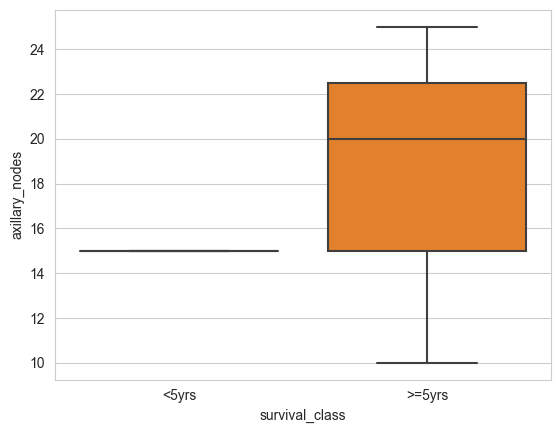

In [30]:
sns.boxplot(data = habermans_dataset,x="survival_class",y="axillary_nodes")

### Violin Plot

<Axes: xlabel='survival_class', ylabel='axillary_nodes'>

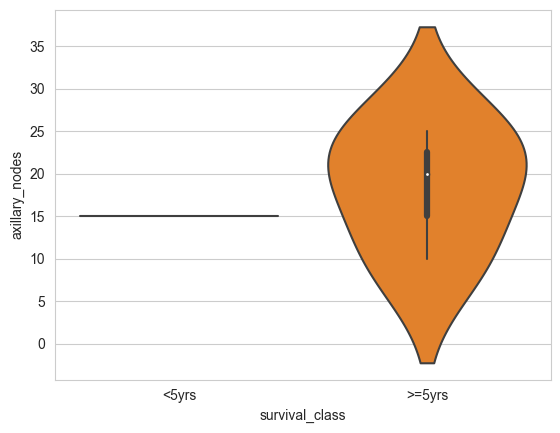

In [31]:
sns.violinplot(data = habermans_dataset,x='survival_class',y='axillary_nodes')